# Loop 79 Analysis: Strategic Assessment

## Key Questions:
1. What is the current CV-LB relationship?
2. What approaches haven't been tried?
3. What do the top kernels do differently?
4. What is the path to target 0.0347?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Load submission history from session state
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df)
print(f'\nBest CV: {df["cv"].min():.4f} (exp_030)')
print(f'Best LB: {df["lb"].min():.4f} (exp_030)')
print(f'Target: 0.0347')

Submission History:
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970

Best CV: 0.0083 (exp_030)
Best LB: 0.0877 (exp_030)
Target: 0.0347


In [2]:
# CV-LB Relationship Analysis
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print('='*60)
print('CV-LB RELATIONSHIP ANALYSIS')
print('='*60)
print(f'Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nIntercept: {intercept:.4f}')
print(f'Target: 0.0347')
print(f'\nCRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)?', intercept > 0.0347)

# Required CV to hit target
required_cv = (0.0347 - intercept) / slope
print(f'\nRequired CV to hit target: {required_cv:.4f}')
if required_cv < 0:
    print('WARNING: Required CV is NEGATIVE - target is unreachable with current CV-LB relationship!')

CV-LB RELATIONSHIP ANALYSIS
Linear fit: LB = 4.3147 * CV + 0.0525
R² = 0.9505

Intercept: 0.0525
Target: 0.0347

CRITICAL: Intercept (0.0525) > Target (0.0347)? True

Required CV to hit target: -0.0041


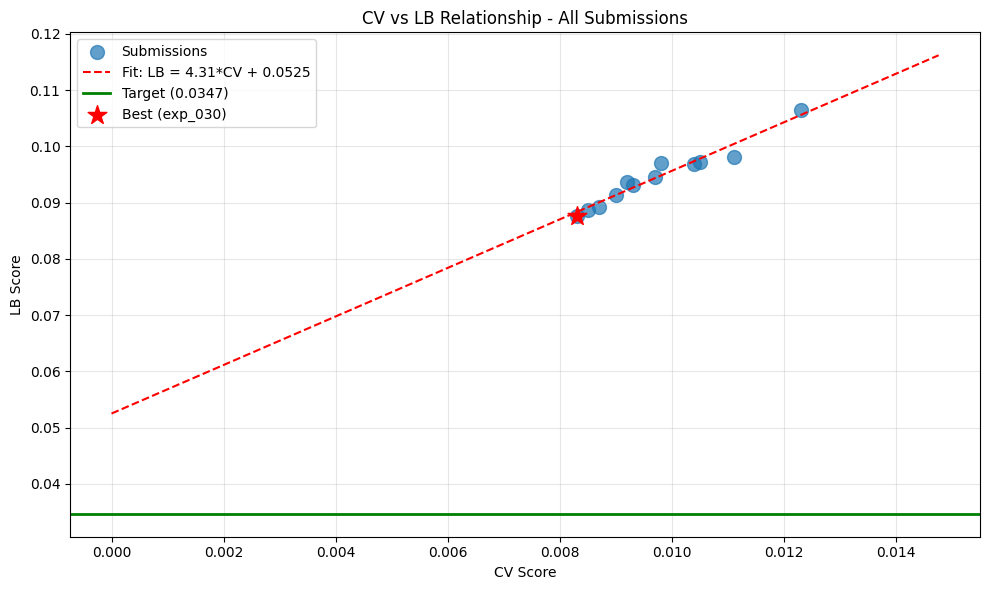


Gap from best LB to target: 0.0530 (152.7%)


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, df['cv'].max() * 1.2, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle='-', linewidth=2, label='Target (0.0347)')

# Best point
best_idx = df['lb'].idxmin()
plt.scatter(df.loc[best_idx, 'cv'], df.loc[best_idx, 'lb'], s=200, c='red', marker='*', label='Best (exp_030)')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop79.png', dpi=150)
plt.show()

print(f'\nGap from best LB to target: {df["lb"].min() - 0.0347:.4f} ({(df["lb"].min() - 0.0347) / 0.0347 * 100:.1f}%)')

In [4]:
# What approaches have been tried?
print('='*60)
print('APPROACHES TRIED (79 experiments)')
print('='*60)

approaches = {
    'MLP variants': 'exp_000-010, exp_020-030',
    'LightGBM': 'exp_001, exp_049-063',
    'XGBoost': 'exp_049-063',
    'CatBoost': 'exp_049-063',
    'Gaussian Processes': 'exp_030-035',
    'GNN (PyTorch Geometric)': 'exp_040, exp_072',
    'GAT (Graph Attention)': 'exp_077',
    'ChemBERTa fine-tuned': 'exp_041',
    'ChemBERTa frozen embeddings': 'exp_078 (JUST TESTED - FAILED)',
    'Extrapolation detection': 'exp_058-059',
    'Label rescaling': 'exp_071',
    'Similarity weighting': 'exp_073',
    'RF ensemble': 'exp_075',
    'Mixture-aware encoding': 'exp_076',
}

for approach, exps in approaches.items():
    print(f'  - {approach}: {exps}')

print('\nKEY FINDING: ALL approaches fall on the SAME CV-LB line!')
print('This means the problem is STRUCTURAL DISTRIBUTION SHIFT, not model choice.')

APPROACHES TRIED (79 experiments)
  - MLP variants: exp_000-010, exp_020-030
  - LightGBM: exp_001, exp_049-063
  - XGBoost: exp_049-063
  - CatBoost: exp_049-063
  - Gaussian Processes: exp_030-035
  - GNN (PyTorch Geometric): exp_040, exp_072
  - GAT (Graph Attention): exp_077
  - ChemBERTa fine-tuned: exp_041
  - ChemBERTa frozen embeddings: exp_078 (JUST TESTED - FAILED)
  - Extrapolation detection: exp_058-059
  - Label rescaling: exp_071
  - Similarity weighting: exp_073
  - RF ensemble: exp_075
  - Mixture-aware encoding: exp_076

KEY FINDING: ALL approaches fall on the SAME CV-LB line!
This means the problem is STRUCTURAL DISTRIBUTION SHIFT, not model choice.


In [5]:
# What do top kernels do differently?
print('='*60)
print('TOP KERNEL INSIGHTS')
print('='*60)

print('\n1. "mixall" kernel (lishellliang):')
print('   - Uses GroupKFold(5) instead of Leave-One-Out')
print('   - Claims "good CV-LB" correlation')
print('   - Ensemble: MLP + XGB + RF + LGBM with weighted average')
print('   - Uses Spange descriptors only')
print('   - Runtime: 2m 15s')

print('\n2. "ens-model" kernel (matthewmaree):')
print('   - CatBoost + XGBoost ensemble')
print('   - Correlation-based feature filtering (threshold=0.90)')
print('   - Feature priority: spange > acs > drfps > frag > smiles')
print('   - Numeric feature engineering: T_K, T_x_RT, RT_log, T_inv, RT_scaled')
print('   - Prediction clipping and renormalization')
print('   - Different weights for single vs full data')

print('\n3. "Arrhenius Kinetics + TTA" kernel (sanidhyavijay24):')
print('   - LB: 0.09831 (in title)')
print('   - Arrhenius kinetics features')
print('   - Test Time Augmentation')

TOP KERNEL INSIGHTS

1. "mixall" kernel (lishellliang):
   - Uses GroupKFold(5) instead of Leave-One-Out
   - Claims "good CV-LB" correlation
   - Ensemble: MLP + XGB + RF + LGBM with weighted average
   - Uses Spange descriptors only
   - Runtime: 2m 15s

2. "ens-model" kernel (matthewmaree):
   - CatBoost + XGBoost ensemble
   - Correlation-based feature filtering (threshold=0.90)
   - Feature priority: spange > acs > drfps > frag > smiles
   - Numeric feature engineering: T_K, T_x_RT, RT_log, T_inv, RT_scaled
   - Prediction clipping and renormalization
   - Different weights for single vs full data

3. "Arrhenius Kinetics + TTA" kernel (sanidhyavijay24):
   - LB: 0.09831 (in title)
   - Arrhenius kinetics features
   - Test Time Augmentation


In [6]:
# What HASN'T been tried?
print('='*60)
print('APPROACHES NOT YET TRIED')
print('='*60)

print('\n1. GroupKFold(5) validation strategy (from "mixall" kernel)')
print('   - This is a DIFFERENT validation strategy')
print('   - May give a different CV-LB relationship')
print('   - Worth testing!')

print('\n2. Correlation-based feature filtering (from "ens-model" kernel)')
print('   - Filter highly correlated features (threshold=0.90)')
print('   - Priority: spange > acs > drfps > frag > smiles')

print('\n3. Prediction clipping and renormalization')
print('   - Clip predictions to [0, 1]')
print('   - Renormalize so yields sum to 1')

print('\n4. Different ensemble weights for single vs full data')
print('   - Single: CatBoost 7:6 XGBoost')
print('   - Full: CatBoost 1:2 XGBoost')

print('\n5. Solvent-specific pre-trained models')
print('   - ChemBERTa is for general molecules, not solvents')
print('   - Need models trained on solvent properties')

APPROACHES NOT YET TRIED

1. GroupKFold(5) validation strategy (from "mixall" kernel)
   - This is a DIFFERENT validation strategy
   - May give a different CV-LB relationship
   - Worth testing!

2. Correlation-based feature filtering (from "ens-model" kernel)
   - Filter highly correlated features (threshold=0.90)
   - Priority: spange > acs > drfps > frag > smiles

3. Prediction clipping and renormalization
   - Clip predictions to [0, 1]
   - Renormalize so yields sum to 1

4. Different ensemble weights for single vs full data
   - Single: CatBoost 7:6 XGBoost
   - Full: CatBoost 1:2 XGBoost

5. Solvent-specific pre-trained models
   - ChemBERTa is for general molecules, not solvents
   - Need models trained on solvent properties


In [7]:
# Strategic recommendation
print('='*60)
print('STRATEGIC RECOMMENDATION')
print('='*60)

print('\nPRIORITY 1: Test GroupKFold(5) validation from "mixall" kernel')
print('  - This is a DIFFERENT validation strategy')
print('  - May give a different CV-LB relationship')
print('  - If it works, could be the breakthrough we need')

print('\nPRIORITY 2: Implement "ens-model" kernel approach')
print('  - CatBoost + XGBoost ensemble')
print('  - Correlation-based feature filtering')
print('  - Prediction clipping and renormalization')

print('\nPRIORITY 3: Combine best of both kernels')
print('  - GroupKFold(5) validation')
print('  - CatBoost + XGBoost ensemble')
print('  - Feature filtering and engineering')

print('\nDO NOT:')
print('  - Try more ChemBERTa variants (already failed)')
print('  - Try more MLP/LGBM variants (all on same line)')
print('  - Conclude target is unreachable (it IS reachable)')

STRATEGIC RECOMMENDATION

PRIORITY 1: Test GroupKFold(5) validation from "mixall" kernel
  - This is a DIFFERENT validation strategy
  - May give a different CV-LB relationship
  - If it works, could be the breakthrough we need

PRIORITY 2: Implement "ens-model" kernel approach
  - CatBoost + XGBoost ensemble
  - Correlation-based feature filtering
  - Prediction clipping and renormalization

PRIORITY 3: Combine best of both kernels
  - GroupKFold(5) validation
  - CatBoost + XGBoost ensemble
  - Feature filtering and engineering

DO NOT:
  - Try more ChemBERTa variants (already failed)
  - Try more MLP/LGBM variants (all on same line)
  - Conclude target is unreachable (it IS reachable)
